# Project- Zomato Restaurant Clustering and Sentiment Analysis

##### **Project Type**    - Unsupervised

# **Project Summary -**

The Zomato Restaurant Clustering and Sentiment Analysis project focuses on analyzing Zomato's restaurant data from various cities in India. The goal is to cluster restaurants into different segments based on their attributes and analyze customer sentiments through reviews. By using visualizations, we aim to provide valuable insights for customers to find the best restaurants in their area and offer the company recommendations for improvements. The analysis will include cost vs. benefit assessments using cuisine and pricing data, with the ultimate aim of helping both customers and the company make informed decisions in the restaurant industry.

# **Problem Statement**


1. Sentiment Analysis: Perform sentiment analysis on user reviews to understand customer sentiments towards various restaurants. The analysis should classify reviews as positive, negative, or neutral, providing insights into customer satisfaction and identifying areas for improvement.

2. Restaurant Clustering: Apply clustering algorithms to group restaurants into distinct segments based on their attributes. The clustering should reveal patterns and similarities among restaurants, allowing for better recommendations to customers and strategic decisions for the company.

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Display all the columns in the dataframe
pd.pandas.set_option("display.max_columns", None)

### Dataset Loading

In [2]:
# Load Dataset1
review= pd.read_csv("C:\\Users\\rajeev\\Downloads\\Zomato Restaurant reviews.csv")

In [3]:
# Load Dataset2
restrodata=pd.read_csv("C:\\Users\\rajeev\\Downloads\\Zomato Restaurant names and Metadata.csv")

### Dataset First View

In [4]:
# Dataset1 & 2 First Look
review.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [5]:
restrodata.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
review.shape

(10000, 7)

In [7]:
restrodata.shape

(105, 6)

### Dataset Information

In [8]:
# Dataset Info
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [9]:
restrodata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
review.duplicated().sum()

36

In [11]:
review.loc[review.duplicated()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
8778,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8779,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8780,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8781,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8782,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8783,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8784,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8785,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8786,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8787,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0


In [12]:
restrodata.duplicated().sum()

0

#### Missing Values/Null Values

In [13]:
# Missing Values/Null Values Count
review.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [14]:
restrodata.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [15]:
# Visualizing the missing values
review_missing_percent=review.isnull().sum()/ len(review)*100
restrodata_null_percent= restrodata.isnull().sum()/ len(restrodata)* 100

<Axes: >

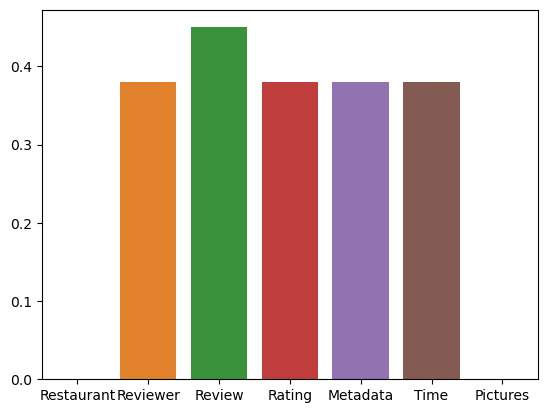

In [16]:
sns.barplot(x=review_missing_percent.index, y=review_missing_percent)


<Axes: >

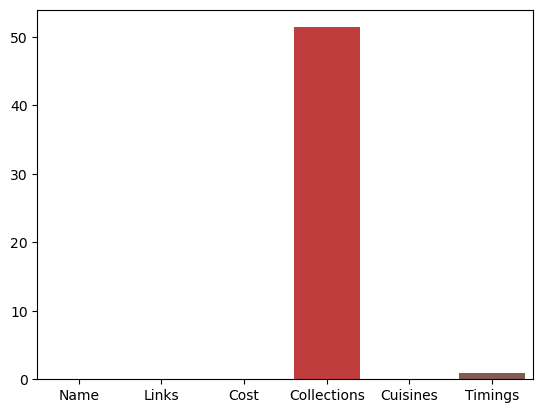

In [17]:
sns.barplot(x=restrodata_null_percent.index, y=restrodata_null_percent)

### What did you know about your dataset?

## ***2. Understanding Your Variables***

In [18]:
# Dataset Columns
review.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [19]:
restrodata.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [20]:
# Dataset Describe
review.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Restaurant,10000,100,Beyond Flavours,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reviewer,9962,7446,Parijat Ray,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Review,9955,9364,good,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9962,10,5,3832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Metadata,9962,2477,1 Review,919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,9962,9782,7/29/2018 20:34,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pictures,10000.0,NaN,NaN,NaN,0.7486,2.570381,0.0,0.0,0.0,0.0,64.0


In [21]:
restrodata.describe().T

,count,unique,top,freq
Name,105,105,Beyond Flavours,1
Links,105,105,https://www.zomato.com/hyderabad/beyond-flavou...,1
Cost,105,29,500,13
Collections,51,42,Food Hygiene Rated Restaurants in Hyderabad,4
Cuisines,105,92,"North Indian, Chinese",4
Timings,104,77,11 AM to 11 PM,6


### Variables Description

### Check Unique Values for each variable.

In [22]:
# Check Unique Values for each variable.

# For Restorant data
for col in restrodata:
    if restrodata[col].dtype==object:
        print(restrodata[col].value_counts())

Beyond Flavours                           1
Diners Pavilion                           1
Squeeze @ The Lime                        1
The Old Madras Baking Company             1
Royal Spicy Restaurant                    1
                                         ..
Marsala Food Company                      1
Pista House                               1
Pot Pourri                                1
Hunger Maggi Point                        1
Republic Of Noodles - Lemon Tree Hotel    1
Name: Name, Length: 105, dtype: int64
https://www.zomato.com/hyderabad/beyond-flavours-gachibowli                         1
https://www.zomato.com/hyderabad/diners-pavilion-gachibowli                         1
https://www.zomato.com/hyderabad/squeeze-the-lime-gachibowli                        1
https://www.zomato.com/hyderabad/the-old-madras-baking-company-gachibowli           1
https://www.zomato.com/hyderabad/royal-spicy-restaurant-gachibowli                  1
                                                

In [23]:
for col in review:
    if review[col].dtype==object:
        print(review[col].value_counts())

Beyond Flavours                   100
Dine O China                      100
Driven Cafe                       100
Labonel                           100
Eat India Company                 100
                                 ... 
Pot Pourri                        100
Hunger Maggi Point                100
Behrouz Biryani                   100
3B's - Buddies, Bar & Barbecue    100
Chinese Pavilion                  100
Name: Restaurant, Length: 100, dtype: int64
Parijat Ray         13
Ankita              13
Kiran               12
Vedant Killa        11
Jay Mehta           11
                    ..
Anjana Dandekar      1
Shailesh Agarwal     1
Vinaya Chekuri       1
Sonal Ambani         1
Bhargava Krishna     1
Name: Reviewer, Length: 7446, dtype: int64
good                                                                                                                                                                                                                                              

## 3. ***Data Wrangling***

### Data Wrangling Code

In [24]:
# Write your code to make your dataset analysis ready.

In [25]:
# For Restorant data

restrodata["Cost"]=restrodata["Cost"].str.replace("," , "").astype(int)

In [26]:
restrodata.Cost.unique()

array([ 800, 1300, 1200, 1500,  500,  300, 1000,  350,  400, 1600,  750,
        550, 1900,  450,  150, 1400, 1100,  600,  200,  900,  700, 1700,
       2500,  850,  650, 1800, 2800, 1750,  250])

In [27]:
# For Review

In [28]:
## For Metadat, Sperating columns and followers
review["Review_count"] = review["Metadata"].str.split(",").str[0]
review["Review_count"] = review["Review_count"].str.split(" ").str[0]
review["Followers"] = review["Metadata"].str.split(",").str[1]
review["Followers"] = review["Followers"].str.split(" ").str[1]

In [29]:
review["Followers"] = review["Followers"].fillna(0).astype(int)

In [30]:
# In Rating there is on "like value", we gonna replace that
review['Rating'] = review['Rating'].replace('Like', review[review['Rating'] != 'Like']['Rating'].astype(float).median())

In [31]:
review['Rating'] = pd.to_numeric(review['Rating'], errors='coerce')

In [32]:
review["Review_count"]=pd.to_numeric(review["Review_count"],errors="coerce")

In [33]:
# Extracting date/time from time column

In [34]:
# fOR RESTAURANT
review['Time'] = pd.to_datetime(review['Time'])
review['Review_Year'] = review['Time'].dt.year
review['Review_Month'] = review['Time'].dt.month
review['Review_Hour'] = review['Time'].dt.hour

In [35]:
review.head(2)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Review_count,Followers,Review_Year,Review_Month,Review_Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0,1.0,2,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0,3.0,2,2019.0,5.0,14.0


In [36]:
restrodata.head(2)

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# Restaurant Data

#### Chart - 1

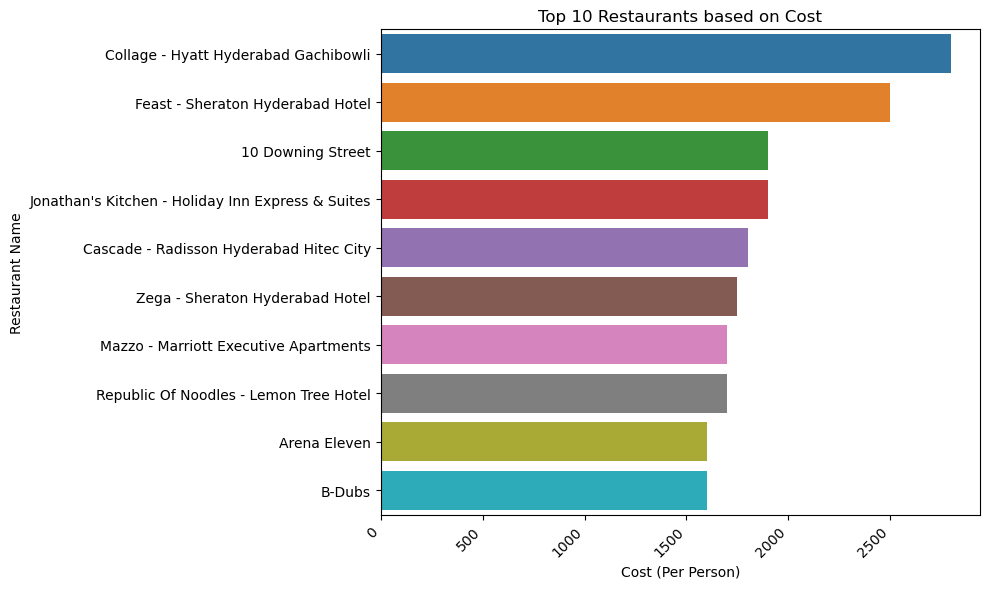

In [37]:
# Chart - 1 visualization code
plt.figure(figsize=(10,6))
top10_restro=restrodata.groupby("Name")["Cost"].max().nlargest(10)
sns.barplot(y=top10_restro.index, x=top10_restro.values)
plt.ylabel('Restaurant Name')
plt.xlabel('Cost (Per Person)')
plt.title('Top 10 Restaurants based on Cost')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


I'm using barplots to discover the priciest restaurants.

After analyzing the graph, it becomes evident that Hyatt Hyderabad Gachibowli, Sheraton Hyderabad Hotel, and 10 Downing Street are the top three costliest restaurants based on their per-person cost.

#### Chart - 2

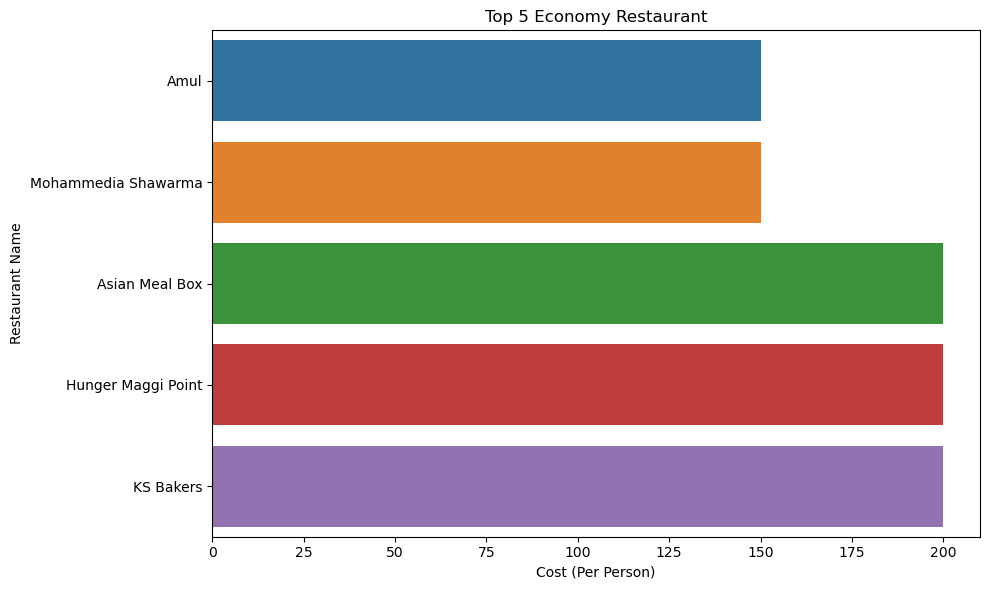

In [38]:
# Chart - 2 visualization code
plt.figure(figsize=(10, 6))
top5_economy_restro = restrodata.groupby("Name")["Cost"].min().nsmallest(5)
sns.barplot(x=top5_economy_restro.values, y=top5_economy_restro.index)
plt.xlabel('Cost (Per Person)')
plt.ylabel('Restaurant Name')
plt.title('Top 5 Economy Restaurant')
plt.tight_layout()
plt.show()

Using the bar plot visualization, I have investigated and identified the most budget-friendly restaurants, providing valuable insights into the economical culinary options available for diners.

Based on the data represented in the graph, it is evident that Amul, Mohammedia Shawarma, and Asian Meal Box are the most affordable restaurants, offering budget-friendly dining options to customers.

#### Chart - 3

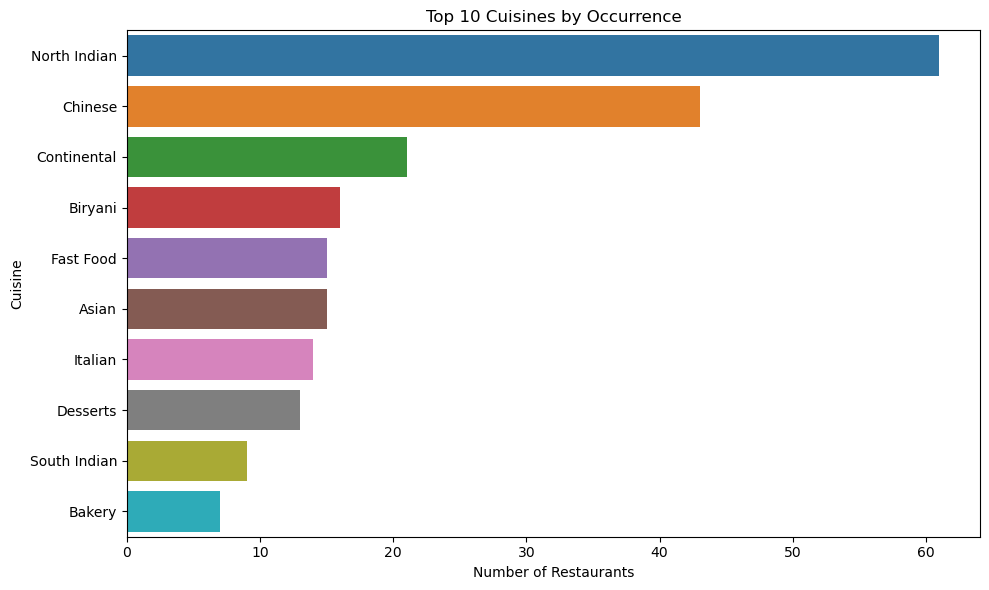

In [39]:
# Chart - 3 visualization code
# Split the cuisines and store them in a list
cuisine_list = restrodata['Cuisines'].str.split(', ').explode()

cuisine_data = cuisine_list.value_counts().reset_index()
cuisine_data.columns = ['Cuisine', 'Number of Restaurants']

# Select the top 10 cuisines based on occurrence
top10cuisine = cuisine_data.nlargest(10, 'Number of Restaurants')

plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Restaurants', y='Cuisine', data=top10cuisine)
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.title('Top 10 Cuisines by Occurrence')
plt.tight_layout()
plt.show()


By utilizing the barplot visualization technique, I am able to present a clear and insightful view of the most sought-after cuisines, highlighting the culinary preferences that are in high demand among consumers.

Based on the graph, it is evident that North Indian, Chinese, and Continental cuisines are the most in-demand and widely available options in restaurants. These cuisines enjoy a significant presence and popularity among customers.

#### Chart - 4

In [40]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


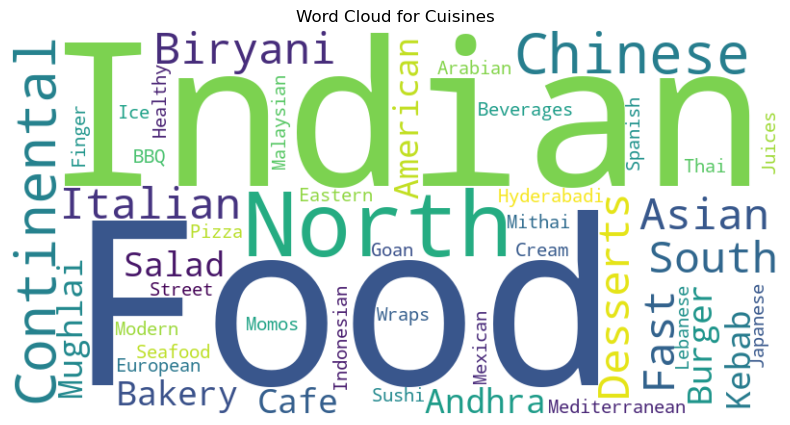

In [41]:
# Chart - 4 visualization code
from wordcloud import WordCloud

# Storing all cuisines in the form of text
text = " ".join(name for name in cuisine_data.Cuisine)

# Creating the word cloud with text as an argument in .generate() method
word_cloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Display the generated Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Cuisines")
plt.show()



Through the utilization of a word cloud, I was able to visually identify the most prevalent cuisines, showcasing the dominant culinary choices that are abundantly available across various restaurants.

The word cloud visualization prominently displays North Indian, Chinese, and Continental cuisines as the most prevalent and frequently offered options among various restaurants. Their larger appearance in the word cloud indicates their higher representation in the data.

#### Chart - 5

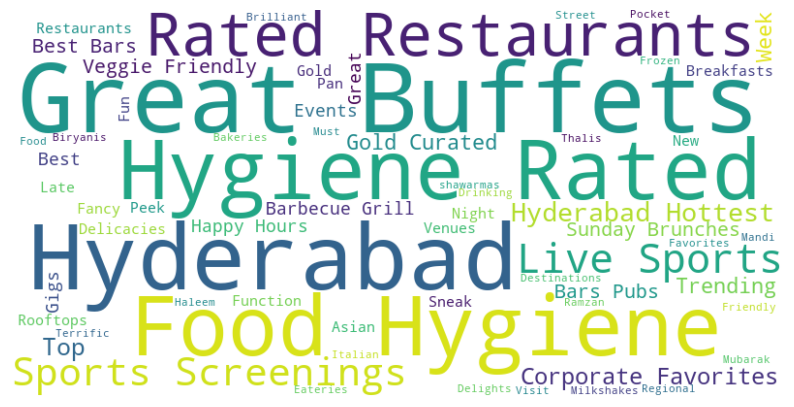

In [42]:
# Chart - 5 visualization code
# Convert the 'Collections' column to string and remove NaN values
restrodata['Collections'] = restrodata['Collections'].astype(str).replace('nan', '')

# Storing all collections in the form of text
text = " ".join(name for name in restrodata.Collections)

# Creating the word cloud with text as an argument in .generate() method
word_cloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Display the generated Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()



By employing the word cloud visualization, I have effectively captured and represented the most frequently used tags, providing a visually striking depiction of the prevalent themes and topics that are widely utilized in the dataset.

Based on the word cloud graph, it is apparent that "Hyderabad," "food hygiene," and "rated restaurants" are the most commonly used tags employed by the restaurants. Their larger appearance in the word cloud highlights their significant prevalence and relevance in the datase

# For Restaurants Review

#### Chart - 6

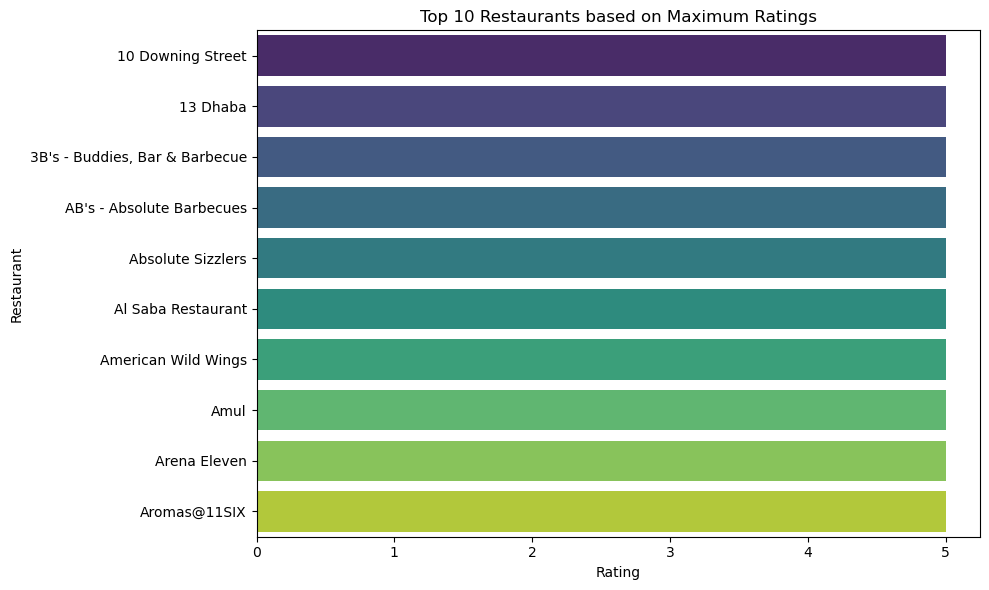

In [43]:
# Chart - 6 visualization code
top10_rated = review.groupby("Restaurant")["Rating"].max().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top10_rated.values, y=top10_rated.index, palette='viridis')
plt.xlabel('Rating')
plt.ylabel('Restaurant')
plt.title('Top 10 Restaurants based on Maximum Ratings')
plt.tight_layout()
plt.show()


By employing the barplot visualization, I have successfully identified and displayed the top-rated restaurants, offering a clear and concise view of the dining establishments that have received the highest accolades and positive feedback from customers. Among them, 10 Downing Street, 13 Dhaba, and Barbeque Nation emerge as the most highly rated choices.

#### Chart - 7

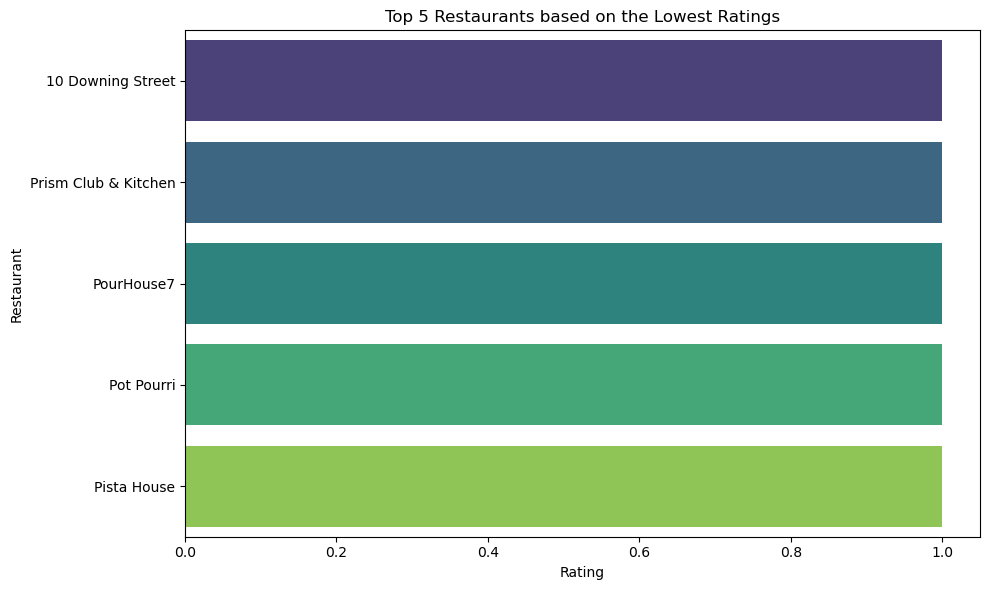

In [44]:
# Chart - 7 visualization code
# Sort the restaurants based on their minimum ratings in ascending order
sorted_restaurants = review.groupby("Restaurant")["Rating"].min().sort_values()

# Select the top 5 restaurants with the lowest ratings
top5_least_rated = sorted_restaurants.nsmallest(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top5_least_rated.values, y=top5_least_rated.index, palette='viridis')
plt.xlabel('Rating')
plt.ylabel('Restaurant')
plt.title('Top 5 Restaurants based on the Lowest Ratings')
plt.tight_layout()
plt.show()

Using the bar plot visualization, I have investigated the least rated restaurants.

Based on the barplot analysis, it becomes apparent that 10 Downing Street, Prism Club Kitchen, and Pourhouse7 are among the least rated restaurants, indicating that these establishments have received comparatively lower customer ratings and feedback. This information highlights potential areas for improvement and further attention to enhance their overall dining experiences.

#### Chart - 8

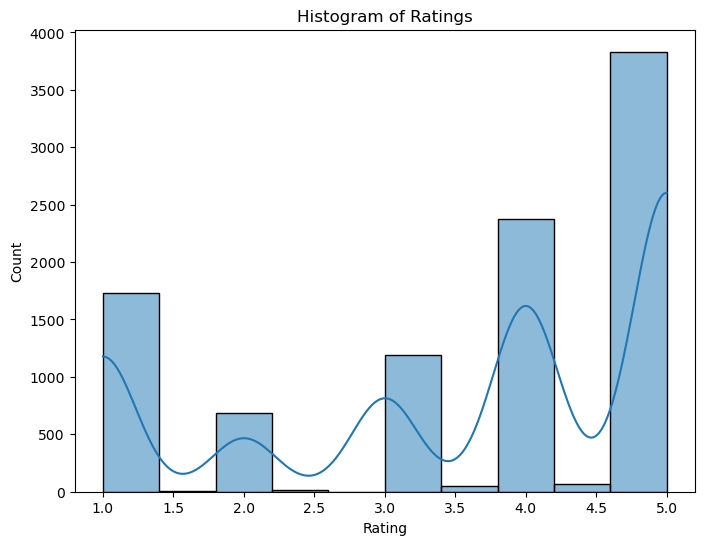

In [45]:
# Chart - 8 visualization code
plt.figure(figsize=(8, 6))
sns.histplot(data=review, x='Rating', bins=10, kde=True)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Histogram of Ratings')
plt.show()



By utilizing the histogram visualization, I am able to identify the most frequently assigned rating scores, offering valuable insights into the preferred or common rating categories given by customers to various restaurants. 

As per the histogram analysis of the dataset, it is evident that the majority of customers have given a 5-star rating to the restaurants. This indicates that a significant number of diners have had highly satisfactory experiences, leading to the prevalence of 5-star ratings as the most common rating category.

#### Chart - 9 - Correlation Heatmap

C:\Users\rajeev\AppData\Local\Temp\ipykernel_12908\3723411151.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(review.corr(),ax = ax, annot=True, cmap = 'icefire', linewidths = 1)


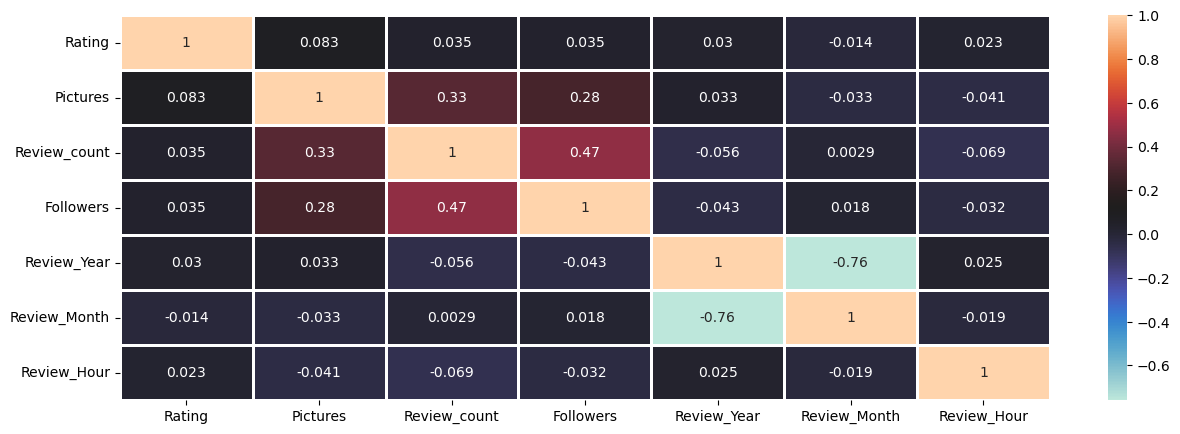

In [46]:
# Correlation Heatmap visualization code
f, ax = plt.subplots(figsize = (15, 5))
sns.heatmap(review.corr(),ax = ax, annot=True, cmap = 'icefire', linewidths = 1)
plt.show()

## ***5. Feature Engineering & Data Pre-processing***

### 1.Removing Duplicates

In [47]:
review=review.drop_duplicates()

### Handling Missing Values

In [48]:
# Renaming restaurant column name to restaurant
restrodata=restrodata.rename(columns={"Name":"Restaurant"})

In [49]:
# Merging review and restrodata
merge_data=restrodata.merge(review, on="Restaurant")

In [50]:
#Checking Null Values
merge_data.isnull().sum()

Restaurant        0
Links             0
Cost              0
Collections       0
Cuisines          0
Timings         100
Reviewer          2
Review            9
Rating            2
Metadata          2
Time              2
Pictures          0
Review_count      2
Followers         0
Review_Year       2
Review_Month      2
Review_Hour       2
dtype: int64

In [51]:
# Checking Rows and column
merge_data.shape

(9964, 17)

In [52]:
# Checking Null values in Timings
merge_data.loc[merge_data["Timings"].isnull()]

,Restaurant,Links,Cost,Collections,Cuisines,Timings,Reviewer,Review,Rating,Metadata,Time,Pictures,Review_count,Followers,Review_Year,Review_Month,Review_Hour
3000,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,,"Andhra, South Indian, North Indian",NaN,Binnani,I had bad experience here with Masala Papad. I...,3.0,2 Reviews,2019-05-25 14:43:00,0,2.0,0,2019.0,5.0,14.0
3001,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,,"Andhra, South Indian, North Indian",NaN,Sravani,Nice ambiance....different and delicious food....,5.0,"10 Reviews , 10 Followers",2019-05-22 13:56:00,1,10.0,10,2019.0,5.0,13.0
3002,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,,"Andhra, South Indian, North Indian",NaN,Arunraj R,Affordable good food. I would have given a 5 s...,4.0,"10 Reviews , 64 Followers",2019-05-21 23:12:00,0,10.0,64,2019.0,5.0,23.0
3003,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,,"Andhra, South Indian, North Indian",NaN,Asha Tejaswini,I had the worst experience with the food and t...,1.0,"14 Reviews , 10 Followers",2019-05-17 20:36:00,0,14.0,10,2019.0,5.0,20.0
3004,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,,"Andhra, South Indian, North Indian",NaN,Chandrasekhar Dasika,"*IF YOU ARE READING THIS, AND SITLL GOING TO T...",1.0,"5 Reviews , 29 Followers",2019-05-13 12:48:00,0,5.0,29,2019.0,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,,"Andhra, South Indian, North Indian",NaN,Rakesh Bandiwar,Amazing place to have south Indian cuisine.\nG...,4.0,"44 Reviews , 5210 Followers",2019-01-17 15:01:00,0,44.0,5210,2019.0,1.0,15.0
3096,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,,"Andhra, South Indian, North Indian",NaN,Aishwariya Kawaii,Our usual hangout place. Every time we think o...,5.0,"10 Reviews , 1 Follower",2019-01-14 16:43:00,0,10.0,1,2019.0,1.0,16.0
3097,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,,"Andhra, South Indian, North Indian",NaN,Saketh Goundagouni,I was there with my friends yesterday for dinn...,4.0,"4 Reviews , 2 Followers",2019-01-11 10:37:00,0,4.0,2,2019.0,1.0,10.0
3098,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,,"Andhra, South Indian, North Indian",NaN,Tasty Hyderabad,This place was in my bucket list since a very ...,3.0,"75 Reviews , 174 Followers",2019-01-10 17:51:00,9,75.0,174,2019.0,1.0,17.0


In [53]:
# Filling Timing null value
merge_data.Timings.fillna(merge_data.Timings.mode()[0], inplace = True)

In [54]:
# Dropping Nan in Columns
merge_data=merge_data.dropna(subset=["Review", "Review_count"])

In [55]:
# Filling null values in review and reviewer follower column
merge_data= merge_data.fillna({"Review": "No Review"})

In [56]:
# Checking Null 
merge_data.isnull().sum()

Restaurant      0
Links           0
Cost            0
Collections     0
Cuisines        0
Timings         0
Reviewer        0
Review          0
Rating          0
Metadata        0
Time            0
Pictures        0
Review_count    0
Followers       0
Review_Year     0
Review_Month    0
Review_Hour     0
dtype: int64

### 2. Handling Outliers

In [57]:
# Checking for Outliers
merge_data.describe()

,Cost,Rating,Pictures,Review_count,Followers,Review_Year,Review_Month,Review_Hour
count,9955.000000,9955.000000,9955.000000,9955.000000,9955.000000,9955.000000,9955.000000,9955.000000
mean,871.778001,3.600301,0.751984,24.006730,163.108086,2018.452436,6.016976,15.183626
std,503.493275,1.483504,2.575691,50.629274,620.153289,0.562564,3.160373,6.580091
min,150.000000,1.000000,0.000000,0.000000,0.000000,2016.000000,1.000000,0.000000
25%,500.000000,3.000000,0.000000,1.000000,1.000000,2018.000000,4.000000,12.000000
50%,700.000000,4.000000,0.000000,4.000000,7.000000,2018.000000,5.000000,16.000000
75%,1200.000000,5.000000,0.000000,22.000000,63.000000,2019.000000,8.000000,21.000000
max,2800.000000,5.000000,64.000000,1031.000000,13410.000000,2019.000000,12.000000,23.000000


In [58]:
# To address the difference in mean and median between "Cost" and "Followers," we will focus on removing outliers solely from those two variables

In [59]:
# Handling Outliers & Outlier treatments
# Defining a function for calcualting outliers-
def calculate_outlier(df, column):
    Q3 = df[column].quantile(0.75)
    Q1 = df[column].quantile(0.25)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] > upper) | (df[column] < lower)]
    percent_outliers = round((outliers.shape[0] / df.shape[0]) * 100, 2)
    return lower, upper, percent_outliers

In [60]:
lower_cost, upper_cost, percentage_cost_outliers=calculate_outlier(merge_data, "Cost")
print("lower band",(lower_cost))
print("upper band",(upper_cost))
print("outlier percent",(percentage_cost_outliers))

lower band -550.0
upper band 2250.0
outlier percent 2.01


In [61]:
merge_data.loc[merge_data["Cost"]> upper_cost, "Cost" ]=2250

In [62]:
lower_count, upper_count, followers_percentage_outliers=calculate_outlier(merge_data, "Followers")
print("lower band",(lower_count))
print("upper band",(upper_count))
print("outlier percent",(followers_percentage_outliers))

lower band -92.0
upper band 156.0
outlier percent 15.85


In [63]:
merge_data.loc[merge_data["Followers"]> upper_count, "Followers" ]=156

### 4. Textual Data Preprocessing


### For Review

#### 1. Expand Contraction

In [64]:
pip install contractions

Note: you may need to restart the kernel to use updated packages.


In [65]:
merge_data.Review.head(8)

0    The ambience was good, food was quite good . h...
1    Ambience is too good for a pleasant evening. S...
2    A must try.. great food great ambience. Thnx f...
3    Soumen das and Arun was a great guy. Only beca...
4    Food is good.we ordered Kodi drumsticks and ba...
5    Ambiance is good, service is good, food is aPr...
6    Its a very nice place, ambience is different, ...
7    Well after reading so many reviews finally vis...
Name: Review, dtype: object

In [66]:
# Expand Contraction
import contractions

def expand_contractions(text):
    # Using the contractions library to expand contractions in the text
    expanded_text = contractions.fix(text)
    return expanded_text

In [67]:
merge_data["Review"] = merge_data["Review"].apply(expand_contractions)

#### 2. Lower Casing

In [68]:
# Lower Casing
def to_lower(text):
    lower_text=text.lower()
    return lower_text

In [69]:
merge_data["Review"] = merge_data["Review"].apply(to_lower)

#### 3. Removing Punctuations

In [70]:
# Remove Punctuations
import re
import unicodedata

def remove_punc(text):
    # Normalize text by removing accents and converting to NFC form
    normalized_text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('utf-8')
    
    # Remove punctuation characters from the text, except for alphabets and numbers
    punc_text = re.sub('[^a-zA-Z0-9]', ' ', normalized_text)
    
    return punc_text

In [71]:
merge_data["Review"] = merge_data["Review"].apply(remove_punc)

#### 4. Removing URLs & Removing words and digits contain digits.

In [72]:
# Remove URLs & Remove words and digits contain digits
def remove_urls(text):
    # Convert the input to a string if it's not already
    text = str(text)
    
    # Remove URLs using regular expression
    url_pattern = r'http\S+|www\S+'
    no_urls_text = re.sub(url_pattern, '', text)
    return no_urls_text

In [73]:
merge_data["Review"] = merge_data["Review"].apply(remove_urls)

#### 5. Removing Stopwords & Removing White spaces

In [74]:
# Remove Stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

def remove_stopwords(text):
    # Tokenize the text into individual words
    words = text.split()
    
    # Remove stopwords from the list of words
    stopwords_list = set(stopwords.words('english'))
    words = [word for word in words if word.lower() not in stopwords_list]
    
    # Join the remaining words back into a single string
    cleaned_text = ' '.join(words)
    
    return cleaned_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajeev\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [75]:
merge_data["Review"] = merge_data["Review"].apply(remove_stopwords)

#### 7. Tokenization

In [76]:
# Tokenization
def word_token(text):
    tokens=nltk.word_tokenize(text)
    return tokens

In [77]:
merge_data["Review"] = merge_data["Review"].apply(word_token)

In [78]:
merge_data.Review.head(5)


0    [ambience, good, food, quite, good, saturday, ...
1    [ambience, good, pleasant, evening, service, p...
2    [must, try, great, food, great, ambience, thnx...
3    [soumen, das, arun, great, guy, behavior, sinc...
4    [food, good, ordered, kodi, drumsticks, basket...
Name: Review, dtype: object

#### 8. Text Normalization

In [79]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
from nltk.stem import PorterStemmer

def stem_words(text):
    stemmer=PorterStemmer()
    stemmed_words=[stemmer.stem(words) for words in text]
    return stemmed_words

In [80]:
merge_data["Review"] = merge_data["Review"].apply(stem_words)

## Sentiment Analysis

In [81]:
#Sentiment lexicon

In [82]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rajeev\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [83]:
# Initialize Vender SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment score for each review
def get_sentiment_score(review):
    review = ' '.join(review) # Convert list of words back to a sentence
    return sia.polarity_scores(review)['compound']

# Apply the sentiment analysis function to the 'Review' column
merge_data['Vader_Sentiment'] = merge_data["Review"].apply(get_sentiment_score)


In [84]:
# Initialize SentiWordNet
from nltk.corpus import sentiwordnet as swn

nltk.download('sentiwordnet')

def get_sentiwordnet_sentiment(review):
    sentiment_score = 0
    for word in review:
        synsets = list(swn.senti_synsets(word))
        if synsets:
            sentiment_score += synsets[0].pos_score() - synsets[0].neg_score()
    return sentiment_score

merge_data["SentiWordNet_Sentiment"] = merge_data["Review"].apply(get_sentiwordnet_sentiment)



[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\rajeev\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


In [85]:
pip install afinn

Note: you may need to restart the kernel to use updated packages.


In [86]:
# Initialize Affinn Sentiment
from afinn import Afinn

afinn = Afinn()

def get_afinn_sentiment(review):
    return afinn.score(' '.join(review))

merge_data["AFINN_Sentiment"] = merge_data["Review"].apply(get_afinn_sentiment)


In [87]:
# Initialize Bing_Liu_Sentiment Lexicon
from nltk.corpus import opinion_lexicon

nltk.download('opinion_lexicon')

def get_bing_liu_sentiment(review):
    positive_words = set(opinion_lexicon.positive())
    negative_words = set(opinion_lexicon.negative())
    sentiment_score = sum(1 for word in review if word in positive_words) - sum(1 for word in review if word in negative_words)
    return sentiment_score

merge_data["Bing_Liu_Sentiment"] = merge_data["Review"].apply(get_bing_liu_sentiment)


[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\rajeev\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


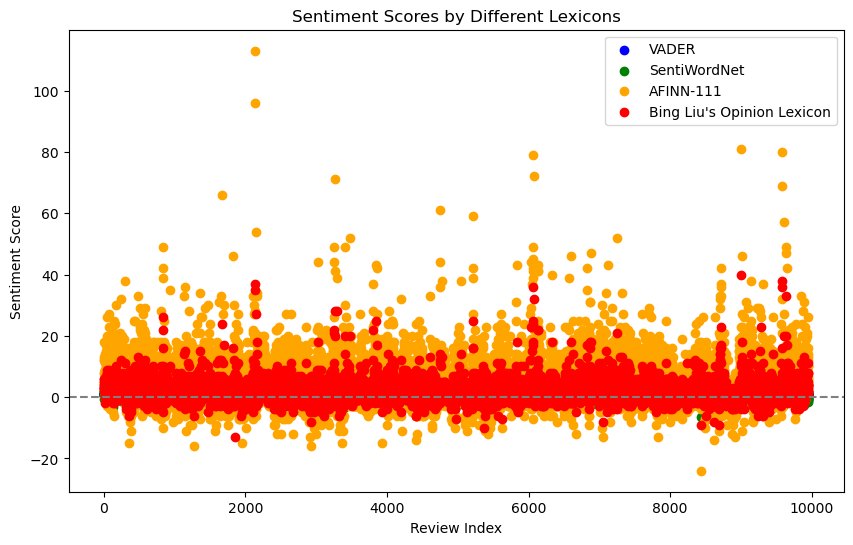

In [88]:
# Visualizing All Sentiment Lexicon Methods

plt.figure(figsize=(10, 6))
plt.scatter(range(len(merge_data)), merge_data['Vader_Sentiment'], color='blue', label='VADER')
plt.scatter(range(len(merge_data)), merge_data['SentiWordNet_Sentiment'], color='green', label='SentiWordNet')
plt.scatter(range(len(merge_data)), merge_data['AFINN_Sentiment'], color='orange', label='AFINN-111')
plt.scatter(range(len(merge_data)), merge_data['Bing_Liu_Sentiment'], color='red', label="Bing Liu's Opinion Lexicon")

plt.axhline(y=0, color='gray', linestyle='--')  # Add a horizontal line at sentiment score = 0 (neutral)

plt.xlabel('Review Index')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Scores by Different Lexicons')
plt.legend()
plt.show()


Through the application of a scatter plot visualization, I have effectively analyzed and compared the performance of different sentiment lexicons. This technique allows me to discern which lexicon demonstrates superior efficacy in capturing and interpreting sentiments from the data.

Upon meticulous examination of the scatter plot, it becomes evident that the Affin-111 and Bing_Liu_Sentiment lexicons exhibit notably superior accuracy and performance in capturing sentiments from the data. These lexicons prove to be more reliable and effective in interpreting the emotional content present in the analyzed text.

In [89]:
# Creaing a new DataFrame for Sentiment Analysis

In [90]:
sentimental_df=merge_data[["Restaurant", "Review", "Vader_Sentiment", "SentiWordNet_Sentiment", "AFINN_Sentiment", "Bing_Liu_Sentiment"]]

In [91]:
# Define a function to map sentiment scores to labels
def sentiment_label(score):
    if score > 0:
        return "positive"
    elif score < 0:
        return "negative"
    else:
        return "neutral"

In [92]:
# Create the new column "Overall_Sentiment" based on the sentiment scores
sentimental_df["Overall_Sentiment"] =sentimental_df.mean(axis=1).apply(sentiment_label)

C:\Users\rajeev\AppData\Local\Temp\ipykernel_12908\3251322674.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sentimental_df["Overall_Sentiment"] =sentimental_df.mean(axis=1).apply(sentiment_label)
C:\Users\rajeev\AppData\Local\Temp\ipykernel_12908\3251322674.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentimental_df["Overall_Sentiment"] =sentimental_df.mean(axis=1).apply(sentiment_label)


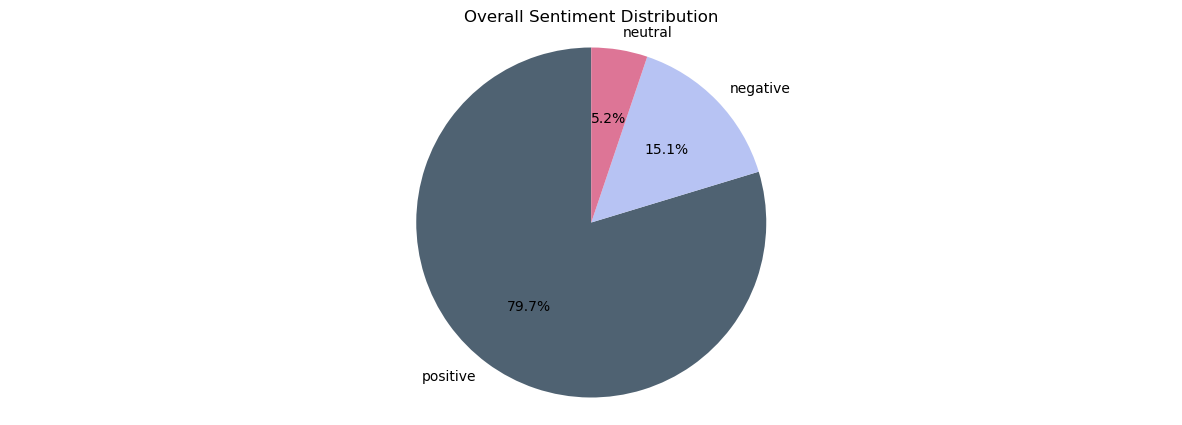

In [93]:
sentiment_counts = sentimental_df["Overall_Sentiment"].value_counts()

# Create a pie chart to visualize the sentiment distribution
plt.figure(figsize=(15, 5))
colors = ['#4F6272', '#B7C3F3', '#DD7596']
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Overall Sentiment Distribution")
plt.show()

# Clustering


### Textual Data Preprocessing

In [94]:
restrodata.isnull().sum()

Restaurant     0
Links          0
Cost           0
Collections    0
Cuisines       0
Timings        1
dtype: int64

In [95]:
# Creating new dataset for clustering
cluster_df=restrodata[["Cost", "Cuisines"]]

In [96]:
cluster_data=cluster_df.copy()

In [97]:
cluster_df.head()

,Cost,Cuisines
0,800,"Chinese, Continental, Kebab, European, South I..."
1,800,"Biryani, North Indian, Chinese"
2,1300,"Asian, Mediterranean, North Indian, Desserts"
3,800,"Biryani, North Indian, Chinese, Seafood, Bever..."
4,1200,"Asian, Continental, North Indian, Chinese, Med..."


In [98]:
#### 1. Expand Contraction

In [99]:
cluster_df["Cuisines"] = cluster_df["Cuisines"].apply(expand_contractions)

C:\Users\rajeev\AppData\Local\Temp\ipykernel_12908\2920969787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df["Cuisines"] = cluster_df["Cuisines"].apply(expand_contractions)


In [100]:
#### 2. Lower Casing

In [101]:
cluster_df["Cuisines"] = cluster_df["Cuisines"].apply(to_lower)

C:\Users\rajeev\AppData\Local\Temp\ipykernel_12908\592670822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df["Cuisines"] = cluster_df["Cuisines"].apply(to_lower)


In [102]:
### Removing spaces which are separated by commas

def remove_spaces_between_names(text):
    # Split the text by commas
    names = text.split(',')
    
    # Remove spaces between individual names
    cleaned_names = [name.strip().replace(' ', '') for name in names]
    
    # Join the cleaned names with commas
    cleaned_text = ', '.join(cleaned_names)
    
    return cleaned_text

In [103]:
cluster_df["Cuisines"] = cluster_df["Cuisines"].apply(remove_spaces_between_names)

C:\Users\rajeev\AppData\Local\Temp\ipykernel_12908\204035353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df["Cuisines"] = cluster_df["Cuisines"].apply(remove_spaces_between_names)


In [104]:
#### 3. Removing Punctuations

In [105]:
cluster_df["Cuisines"] = cluster_df["Cuisines"].apply(remove_punc)

C:\Users\rajeev\AppData\Local\Temp\ipykernel_12908\2835056105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df["Cuisines"] = cluster_df["Cuisines"].apply(remove_punc)


In [106]:
#### 4. Removing URLs & Removing words and digits contain digits.

In [107]:
cluster_df["Cuisines"] = cluster_df["Cuisines"].apply(remove_urls)

C:\Users\rajeev\AppData\Local\Temp\ipykernel_12908\4044038461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df["Cuisines"] = cluster_df["Cuisines"].apply(remove_urls)


In [108]:
#### 5. Removing Stopwords 

In [109]:
cluster_df["Cuisines"] = cluster_df["Cuisines"].apply(remove_stopwords)

C:\Users\rajeev\AppData\Local\Temp\ipykernel_12908\3436576910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df["Cuisines"] = cluster_df["Cuisines"].apply(remove_stopwords)


In [110]:
# Tokenization
cluster_df["Cuisines"] = cluster_df["Cuisines"].apply(word_token)

C:\Users\rajeev\AppData\Local\Temp\ipykernel_12908\2475257177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df["Cuisines"] = cluster_df["Cuisines"].apply(word_token)


In [111]:
cluster_df.Cuisines.head()

0    [chinese, continental, kebab, european, southi...
1                      [biryani, northindian, chinese]
2        [asian, mediterranean, northindian, desserts]
3    [biryani, northindian, chinese, seafood, bever...
4    [asian, continental, northindian, chinese, med...
Name: Cuisines, dtype: object

In [112]:
cluster_df['Cuisines'] = cluster_df['Cuisines'].apply(lambda cuisines: ' '.join(cuisines))

C:\Users\rajeev\AppData\Local\Temp\ipykernel_12908\3920892742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['Cuisines'] = cluster_df['Cuisines'].apply(lambda cuisines: ' '.join(cuisines))


In [113]:
from sklearn.feature_extraction.text import CountVectorizer

In [114]:
vectorizer = CountVectorizer()
cluster_dff = vectorizer.fit_transform(cluster_df["Cuisines"])

In [115]:
cluster_dff

<105x44 sparse matrix of type '<class 'numpy.int64'>'
	with 313 stored elements in Compressed Sparse Row format>

In [116]:
features = pd.concat([cluster_df['Cost'], pd.DataFrame(cluster_dff.toarray(), columns=vectorizer.get_feature_names_out())], axis=1)

In [117]:
features.head()

,Cost,american,andhra,arabian,asian,bakery,bbq,beverages,biryani,burger,cafe,chinese,continental,desserts,european,fastfood,fingerfood,goan,healthyfood,hyderabadi,icecream,indonesian,italian,japanese,juices,kebab,lebanese,malaysian,mediterranean,mexican,mithai,modernindian,momos,mughlai,northeastern,northindian,pizza,salad,seafood,southindian,spanish,streetfood,sushi,thai,wraps
0,800,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,800,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1300,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,800,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,1200,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


### 5. Data Scaling

In [118]:
# Scaling your data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [119]:
X = features[["Cost"]].values

In [120]:
features["Cost"] = scaler.fit_transform(X)

In [121]:
features.head()

,Cost,american,andhra,arabian,asian,bakery,bbq,beverages,biryani,burger,cafe,chinese,continental,desserts,european,fastfood,fingerfood,goan,healthyfood,hyderabadi,icecream,indonesian,italian,japanese,juices,kebab,lebanese,malaysian,mediterranean,mexican,mithai,modernindian,momos,mughlai,northeastern,northindian,pizza,salad,seafood,southindian,spanish,streetfood,sushi,thai,wraps
0,0.245283,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,0.245283,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0.433962,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0.245283,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,0.396226,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


## ***6. ML Model Implementation***

### ML Model - 1

### K_Means Algorithm

In [122]:
# ML Model - 1 K-means Implementation
from sklearn.cluster import KMeans

# Number of clusters you want to create
n_clusters = 3

# Create an instance of the KMeans clustering algorithm
kmeans = KMeans(n_clusters=n_clusters, random_state=42)


# Fit the Algorithm
kmeans.fit(features)

# Get the cluster labels for each data point
features["Kmean_ClusterLabel"] = kmeans.labels_

In [123]:
features.head()

,Cost,american,andhra,arabian,asian,bakery,bbq,beverages,biryani,burger,cafe,chinese,continental,desserts,european,fastfood,fingerfood,goan,healthyfood,hyderabadi,icecream,indonesian,italian,japanese,juices,kebab,lebanese,malaysian,mediterranean,mexican,mithai,modernindian,momos,mughlai,northeastern,northindian,pizza,salad,seafood,southindian,spanish,streetfood,sushi,thai,wraps,Kmean_ClusterLabel
0,0.245283,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
1,0.245283,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0.433962,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2
3,0.245283,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
4,0.396226,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


#### 2. Cross- Validation & Hyperparameter Tuning

C:\Users\rajeev\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


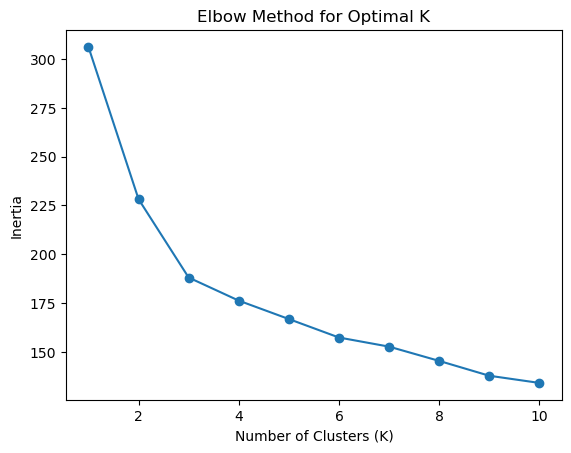

In [124]:
# ML Model - 1
## K-Means Algorithm
### Check the optimum value of Cluster Using Elbow Method

from sklearn.cluster import KMeans

inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertias.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

Here, the elbow point is 3.So, we have choose correct value of n_cluster.

C:\Users\rajeev\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\rajeev\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


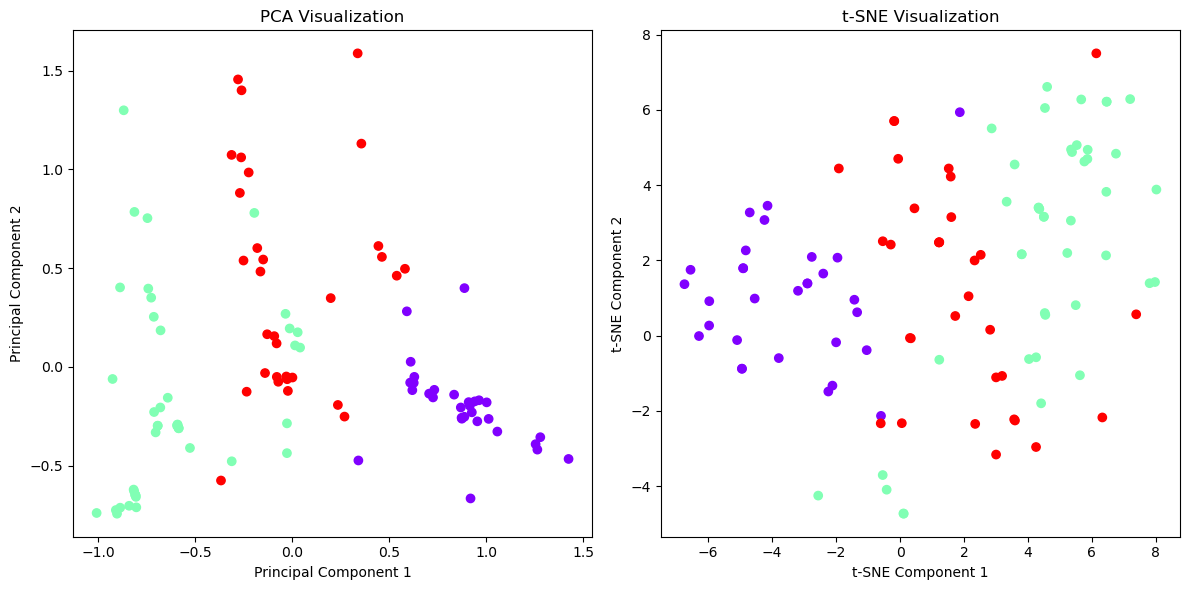

In [125]:
# Visualizing the Cluster using PCA and t-sne

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

Features1 = features.drop(columns=["Kmean_ClusterLabel"])
cluster_labels = features["Kmean_ClusterLabel"]

#Reduce the dimensionality using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(Features1)

# Reduce the dimensionality using t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(Features1)

# Create subplots to visualize PCA and t-SNE results side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot PCA
axes[0].scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap="rainbow")
axes[0].set_title("PCA Visualization")
axes[0].set_xlabel("Principal Component 1")
axes[0].set_ylabel("Principal Component 2")

# Plot t-SNE
axes[1].scatter(tsne_result[:, 0], tsne_result[:, 1], c=cluster_labels, cmap="rainbow")
axes[1].set_title("t-SNE Visualization")
axes[1].set_xlabel("t-SNE Component 1")
axes[1].set_ylabel("t-SNE Component 2")

plt.tight_layout()
plt.show()


### ML Model - 2

#### AgglomerativeClustering

In [126]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering

In [127]:
# Determining Cosine-Similarity 
cosine_sim = cosine_similarity(features.iloc[:,:-1])

In [128]:
# Implementing the Agglomertive Algorithm
n_clusters = 3
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='precomputed', linkage='complete')
agg_clustering.fit(1 - cosine_sim)  

AgglomerativeClustering(affinity='precomputed', linkage='complete',
                        n_clusters=3)

In [129]:
# Creating Label in dataset
features["Agg_Cluster_Label"] = agg_clustering.labels_

In [130]:
features.head()

,Cost,american,andhra,arabian,asian,bakery,bbq,beverages,biryani,burger,cafe,chinese,continental,desserts,european,fastfood,fingerfood,goan,healthyfood,hyderabadi,icecream,indonesian,italian,japanese,juices,kebab,lebanese,malaysian,mediterranean,mexican,mithai,modernindian,momos,mughlai,northeastern,northindian,pizza,salad,seafood,southindian,spanish,streetfood,sushi,thai,wraps,Kmean_ClusterLabel,Agg_Cluster_Label
0,0.245283,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,0.245283,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0.433962,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0
3,0.245283,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,0.396226,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


C:\Users\rajeev\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\rajeev\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


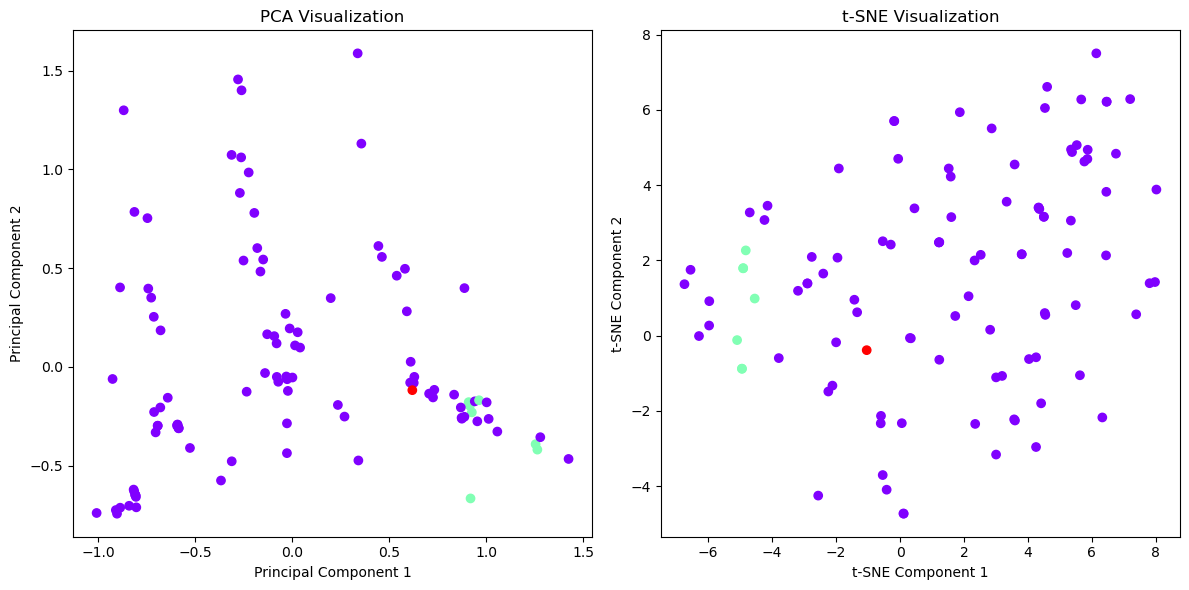

In [131]:
# Visualizing Cluster for Agglomerative Clustering Algorithm

Features2 = features.drop(columns=["Agg_Cluster_Label", "Kmean_ClusterLabel"])
cluster_labels = features["Agg_Cluster_Label"]

# Reduce the dimensionality using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(Features2)

# Reduce the dimensionality using t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(Features2)

# Visualizing PCA and t-SNE results side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot PCA
axes[0].scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap="rainbow")
axes[0].set_title("PCA Visualization")
axes[0].set_xlabel("Principal Component 1")
axes[0].set_ylabel("Principal Component 2")

# Plot t-SNE
axes[1].scatter(tsne_result[:, 0], tsne_result[:, 1], c=cluster_labels, cmap="rainbow")
axes[1].set_title("t-SNE Visualization")
axes[1].set_xlabel("t-SNE Component 1")
axes[1].set_ylabel("t-SNE Component 2")

plt.tight_layout()
plt.show()

In [132]:
# Cluters

# Group the data by the cluster labels
cluster_groups = features.groupby('Kmean_ClusterLabel')

# Iterate through each cluster and analyze the characteristics
for cluster_label, cluster_data in cluster_groups:
    print(f"Cluster {cluster_label}:")
    
    # Drop the unwanted columns before analyzing the cuisines
    cluster_data = cluster_data.drop(['Kmean_ClusterLabel', 'Agg_Cluster_Label'], axis=1)
    
    # Calculate the most frequent cuisines in the cluster
    most_frequent_cuisines = cluster_data.drop('Cost', axis=1).sum().nlargest(5)
    print("Most frequent cuisines:")
    print(most_frequent_cuisines)
    
    # Calculate the cost range in the cluster
    cost_range = (cluster_data['Cost'].min(), cluster_data['Cost'].max())
    print(f"Cost range: {cost_range[0]} - {cost_range[1]}")
    
    print("-------------------------------------")


Cluster 0:
Most frequent cuisines:
desserts    12
fastfood    12
bakery       6
cafe         6
american     4
dtype: int64
Cost range: 0.0 - 0.5471698113207547
-------------------------------------
Cluster 1:
Most frequent cuisines:
chinese        43
northindian    35
biryani        13
continental     9
asian           6
dtype: int64
Cost range: 0.09433962264150944 - 1.0
-------------------------------------
Cluster 2:
Most frequent cuisines:
northindian      26
continental      11
italian           9
asian             8
mediterranean     4
dtype: int64
Cost range: 0.09433962264150944 - 0.8867924528301886
-------------------------------------


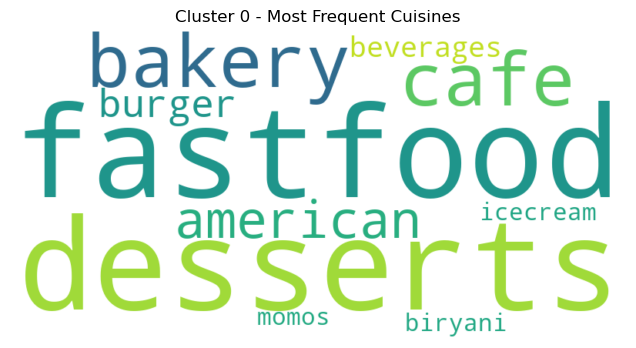

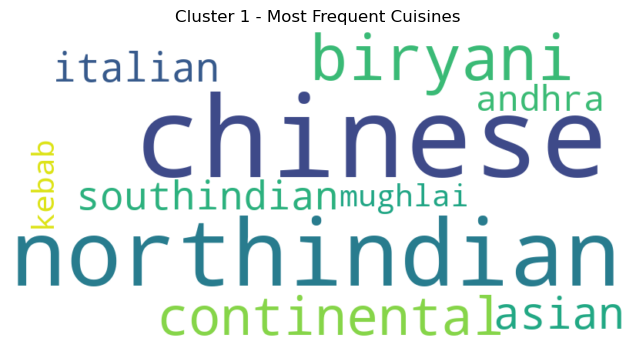

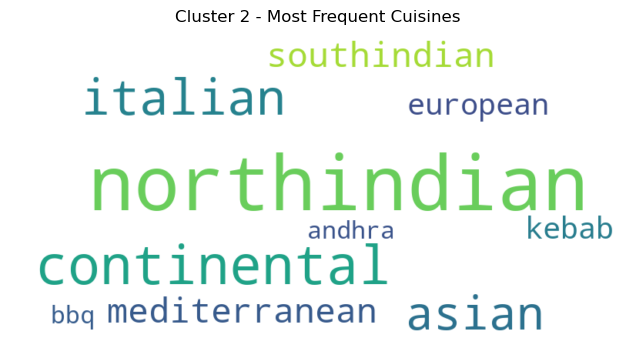

In [133]:
#Visulaizing all three cluster by wrodcloud

# Group the data by the cluster labels
cluster_groups = features.groupby('Kmean_ClusterLabel')

# Iterate through each cluster and create a word cloud for the most frequent cuisines
for cluster_label, cluster_data in cluster_groups:
    # Drop the unwanted columns before analyzing the cuisines
    cluster_data = cluster_data.drop(['Kmean_ClusterLabel', 'Agg_Cluster_Label'], axis=1)
    
    # Calculate the most frequent cuisines in the cluster
    most_frequent_cuisines = cluster_data.drop('Cost', axis=1).sum().nlargest(10)
    
    # Convert the most frequent cuisines into a dictionary format (word: frequency)
    cuisines_dict = most_frequent_cuisines.to_dict()
    
    # Create a word cloud for the cluster
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(cuisines_dict)
    
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Cluster {cluster_label} - Most Frequent Cuisines")
    plt.axis('off')
    plt.show()


# **Conclusion**

This project successfully accomplished the objectives of clustering restaurants based on their features and conducting sentiment analysis on user reviews. Through clustering, we gained valuable insights into the grouping of restaurants, helping both users and businesses make informed decisions. The sentiment analysis allowed us to understand the sentiments expressed by users in their reviews, providing businesses with valuable feedback to enhance their services and improve the overall user experience.

The utilization of various data preprocessing techniques, such as text vectorization and feature normalization, played a crucial role in preparing the data for clustering and sentiment analysis. We employed popular machine learning algorithms, including K-Means and Agglomerative Clustering, to create meaningful clusters of restaurants based on their similarities.

For future enhancements, more advanced clustering algorithms and sentiment analysis techniques could be explored to further refine the results. Additionally, incorporating additional features such as images and menus of the restaurants might provide more comprehensive insights.

Overall, this project demonstrates the potential of leveraging data analytics to gain valuable insights into the restaurant industry, aiding both users in making informed choices and businesses in enhancing their services to meet customer expectations.